# Preprocessing

In [1]:
#Import Library yang diperlukan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import sys
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
#Import dataset

datapath = '../../../1. Data/Raw/Data Historis ADRO.csv'
dataset = pd.read_csv(datapath)
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,01/03/2024,2490,2450,2490,2430,"60,14M","2,89%"
1,29/02/2024,2420,2410,2420,2390,"38,75M","0,83%"
2,28/02/2024,2400,2390,2410,2380,"25,90M","0,84%"
3,27/02/2024,2380,2400,2410,2360,"36,58M","0,42%"
4,26/02/2024,2370,2420,2420,2360,"53,68M","-2,07%"
...,...,...,...,...,...,...,...
2426,07/03/2014,1015,1030,1035,1010,"58,49M","-0,49%"
2427,06/03/2014,1020,1015,1025,1000,"57,32M","0,00%"
2428,05/03/2014,1020,1025,1040,1005,"68,20M","0,49%"
2429,04/03/2014,1015,975,1025,970,"150,13M","3,57%"


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431 entries, 0 to 2430
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tanggal     2431 non-null   object
 1   Terakhir    2431 non-null   int64 
 2   Pembukaan   2431 non-null   int64 
 3   Tertinggi   2431 non-null   int64 
 4   Terendah    2431 non-null   int64 
 5   Vol         2431 non-null   object
 6   Perubahan%  2431 non-null   object
dtypes: int64(4), object(3)
memory usage: 133.1+ KB


In [4]:
dataset.describe()

,Terakhir,Pembukaan,Tertinggi,Terendah
count,2431.000000,2431.000000,2431.000000,2431.000000
mean,1655.400658,1658.623612,1686.603867,1628.712464
std,801.629905,801.661760,813.264532,790.323542
min,437.000000,440.000000,452.000000,437.000000
25%,1120.000000,1120.000000,1145.000000,1100.000000
50%,1390.000000,1395.000000,1415.000000,1360.000000
75%,2040.000000,2040.000000,2070.000000,2000.000000
max,4140.000000,4140.000000,4250.000000,4080.000000


In [5]:
dataset.isna().sum().to_frame(name='num_of_NaN')

,num_of_NaN
Tanggal,0
Terakhir,0
Pembukaan,0
Tertinggi,0
Terendah,0
Vol,0
Perubahan%,0


In [6]:
from datetime import datetime
dataset['Tanggal'] = pd.to_datetime(dataset['Tanggal'],
                                   format = '%d/%m/%Y')
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2024-03-01,2490,2450,2490,2430,"60,14M","2,89%"
1,2024-02-29,2420,2410,2420,2390,"38,75M","0,83%"
2,2024-02-28,2400,2390,2410,2380,"25,90M","0,84%"
3,2024-02-27,2380,2400,2410,2360,"36,58M","0,42%"
4,2024-02-26,2370,2420,2420,2360,"53,68M","-2,07%"
...,...,...,...,...,...,...,...
2426,2014-03-07,1015,1030,1035,1010,"58,49M","-0,49%"
2427,2014-03-06,1020,1015,1025,1000,"57,32M","0,00%"
2428,2014-03-05,1020,1025,1040,1005,"68,20M","0,49%"
2429,2014-03-04,1015,975,1025,970,"150,13M","3,57%"


In [7]:
dataset = dataset.sort_values(by='Tanggal',
                              ascending = True,
                              ignore_index = True)
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2014-03-03,980,980,990,970,"41,65M","-1,51%"
1,2014-03-04,1015,975,1025,970,"150,13M","3,57%"
2,2014-03-05,1020,1025,1040,1005,"68,20M","0,49%"
3,2014-03-06,1020,1015,1025,1000,"57,32M","0,00%"
4,2014-03-07,1015,1030,1035,1010,"58,49M","-0,49%"
...,...,...,...,...,...,...,...
2426,2024-02-26,2370,2420,2420,2360,"53,68M","-2,07%"
2427,2024-02-27,2380,2400,2410,2360,"36,58M","0,42%"
2428,2024-02-28,2400,2390,2410,2380,"25,90M","0,84%"
2429,2024-02-29,2420,2410,2420,2390,"38,75M","0,83%"


In [8]:
dataset_B = dataset[dataset['Vol'].str.contains('B')]
print(dataset_B)

Empty DataFrame
Columns: [Tanggal, Terakhir, Pembukaan, Tertinggi, Terendah, Vol, Perubahan%]
Index: []


In [9]:
dataset_M = dataset[dataset['Vol'].str.contains('M')]
print(dataset_M)

        Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah      Vol Perubahan%
0    2014-03-03       980        980        990       970   41,65M     -1,51%
1    2014-03-04      1015        975       1025       970  150,13M      3,57%
2    2014-03-05      1020       1025       1040      1005   68,20M      0,49%
3    2014-03-06      1020       1015       1025      1000   57,32M      0,00%
4    2014-03-07      1015       1030       1035      1010   58,49M     -0,49%
...         ...       ...        ...        ...       ...      ...        ...
2426 2024-02-26      2370       2420       2420      2360   53,68M     -2,07%
2427 2024-02-27      2380       2400       2410      2360   36,58M      0,42%
2428 2024-02-28      2400       2390       2410      2380   25,90M      0,84%
2429 2024-02-29      2420       2410       2420      2390   38,75M      0,83%
2430 2024-03-01      2490       2450       2490      2430   60,14M      2,89%

[2431 rows x 7 columns]


In [10]:
dataset_K = dataset[dataset['Vol'].str.contains('K')]
print(dataset_K)

Empty DataFrame
Columns: [Tanggal, Terakhir, Pembukaan, Tertinggi, Terendah, Vol, Perubahan%]
Index: []


In [11]:
dataset = dataset.replace(to_replace = ',',
                          value = '.',
                          regex = True)
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2014-03-03,980,980,990,970,41.65M,-1.51%
1,2014-03-04,1015,975,1025,970,150.13M,3.57%
2,2014-03-05,1020,1025,1040,1005,68.20M,0.49%
3,2014-03-06,1020,1015,1025,1000,57.32M,0.00%
4,2014-03-07,1015,1030,1035,1010,58.49M,-0.49%
...,...,...,...,...,...,...,...
2426,2024-02-26,2370,2420,2420,2360,53.68M,-2.07%
2427,2024-02-27,2380,2400,2410,2360,36.58M,0.42%
2428,2024-02-28,2400,2390,2410,2380,25.90M,0.84%
2429,2024-02-29,2420,2410,2420,2390,38.75M,0.83%


In [12]:
def replace_value(value):
    if 'K' in value:
        return str(float(value.replace('K', '')) * 1000)
    elif 'M' in value:
        return str(float(value.replace('M', '')) * 1000000)
    elif 'B' in value:
        return str(float(value.replace('B', '')) * 1000000000)
    return value

dataset['Vol'] = dataset['Vol'].apply(replace_value)

dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2014-03-03,980,980,990,970,41650000.0,-1.51%
1,2014-03-04,1015,975,1025,970,150130000.0,3.57%
2,2014-03-05,1020,1025,1040,1005,68200000.0,0.49%
3,2014-03-06,1020,1015,1025,1000,57320000.0,0.00%
4,2014-03-07,1015,1030,1035,1010,58490000.0,-0.49%
...,...,...,...,...,...,...,...
2426,2024-02-26,2370,2420,2420,2360,53680000.0,-2.07%
2427,2024-02-27,2380,2400,2410,2360,36580000.0,0.42%
2428,2024-02-28,2400,2390,2410,2380,25900000.0,0.84%
2429,2024-02-29,2420,2410,2420,2390,38750000.0,0.83%


In [13]:
dataset.dtypes

Tanggal       datetime64[ns]
Terakhir               int64
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                   object
Perubahan%            object
dtype: object

In [14]:
dataset = dataset.astype({'Terakhir': 'float32'})
dataset.dtypes

Tanggal       datetime64[ns]
Terakhir             float32
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                   object
Perubahan%            object
dtype: object

In [15]:
dataset = dataset.astype({'Vol': 'float32'})
dataset.dtypes

Tanggal       datetime64[ns]
Terakhir             float32
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                  float32
Perubahan%            object
dtype: object

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431 entries, 0 to 2430
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     2431 non-null   datetime64[ns]
 1   Terakhir    2431 non-null   float32       
 2   Pembukaan   2431 non-null   int64         
 3   Tertinggi   2431 non-null   int64         
 4   Terendah    2431 non-null   int64         
 5   Vol         2431 non-null   float32       
 6   Perubahan%  2431 non-null   object        
dtypes: datetime64[ns](1), float32(2), int64(3), object(1)
memory usage: 114.1+ KB


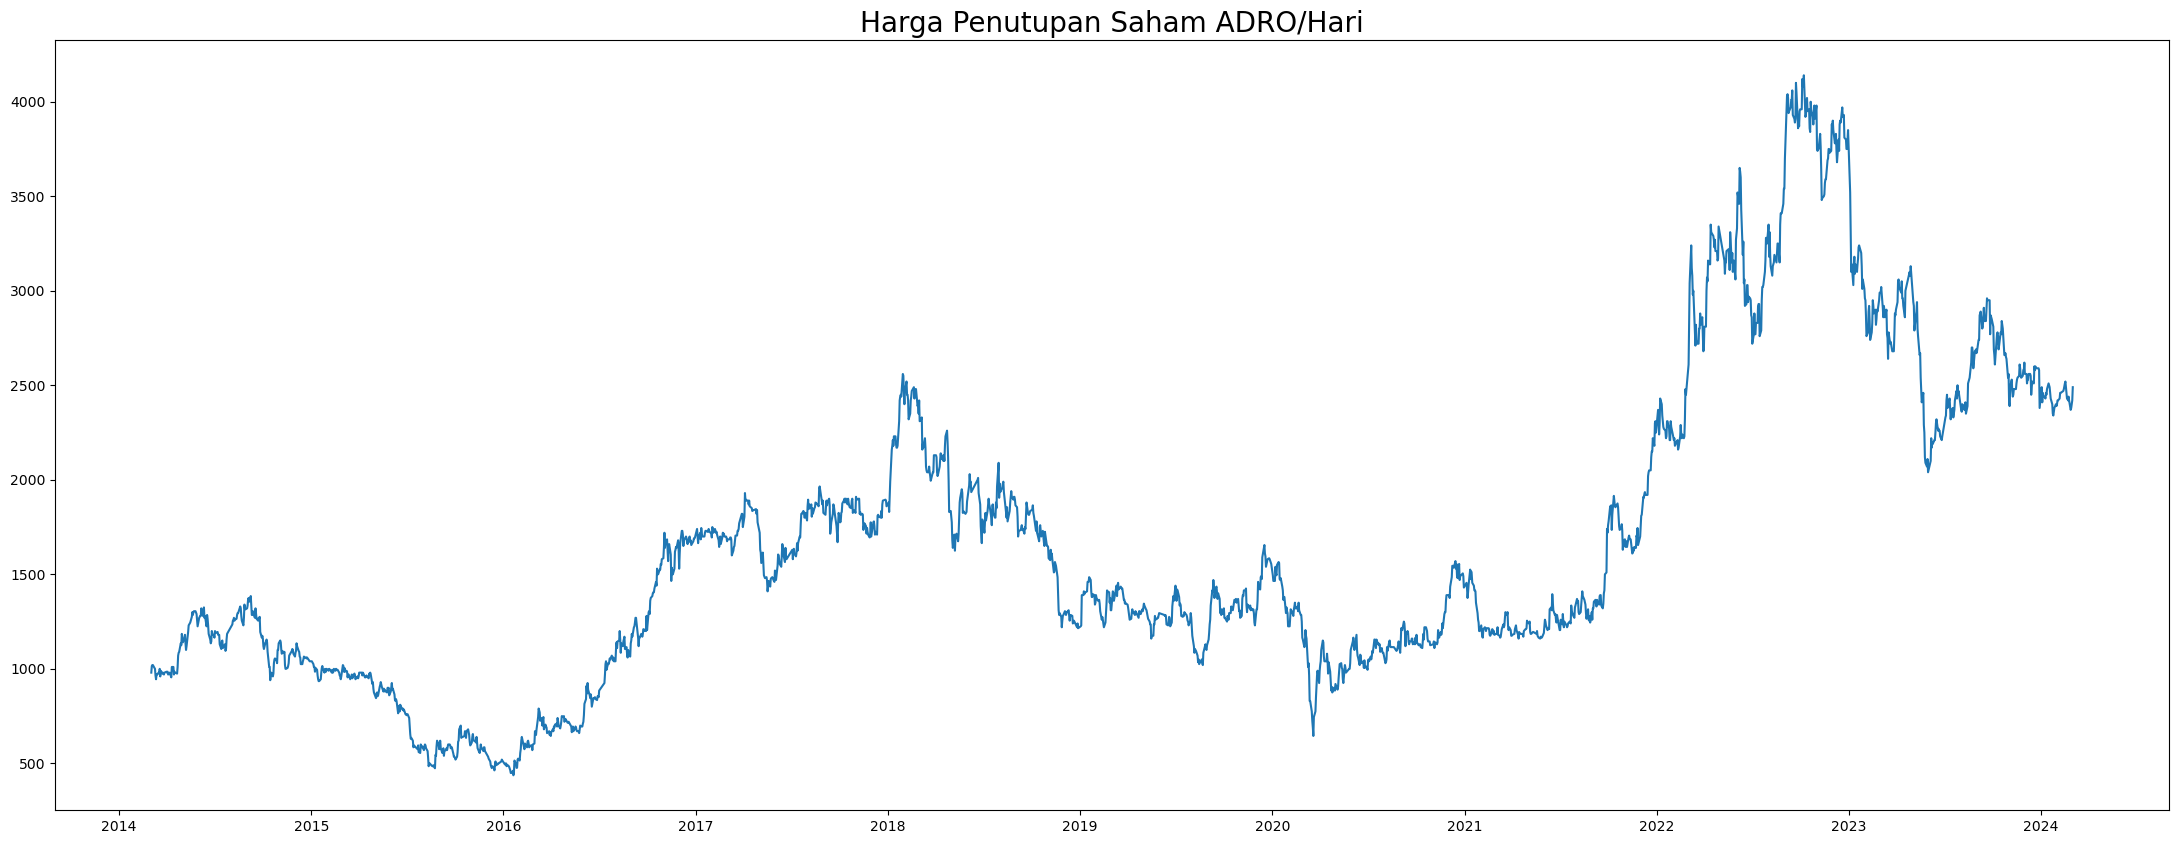

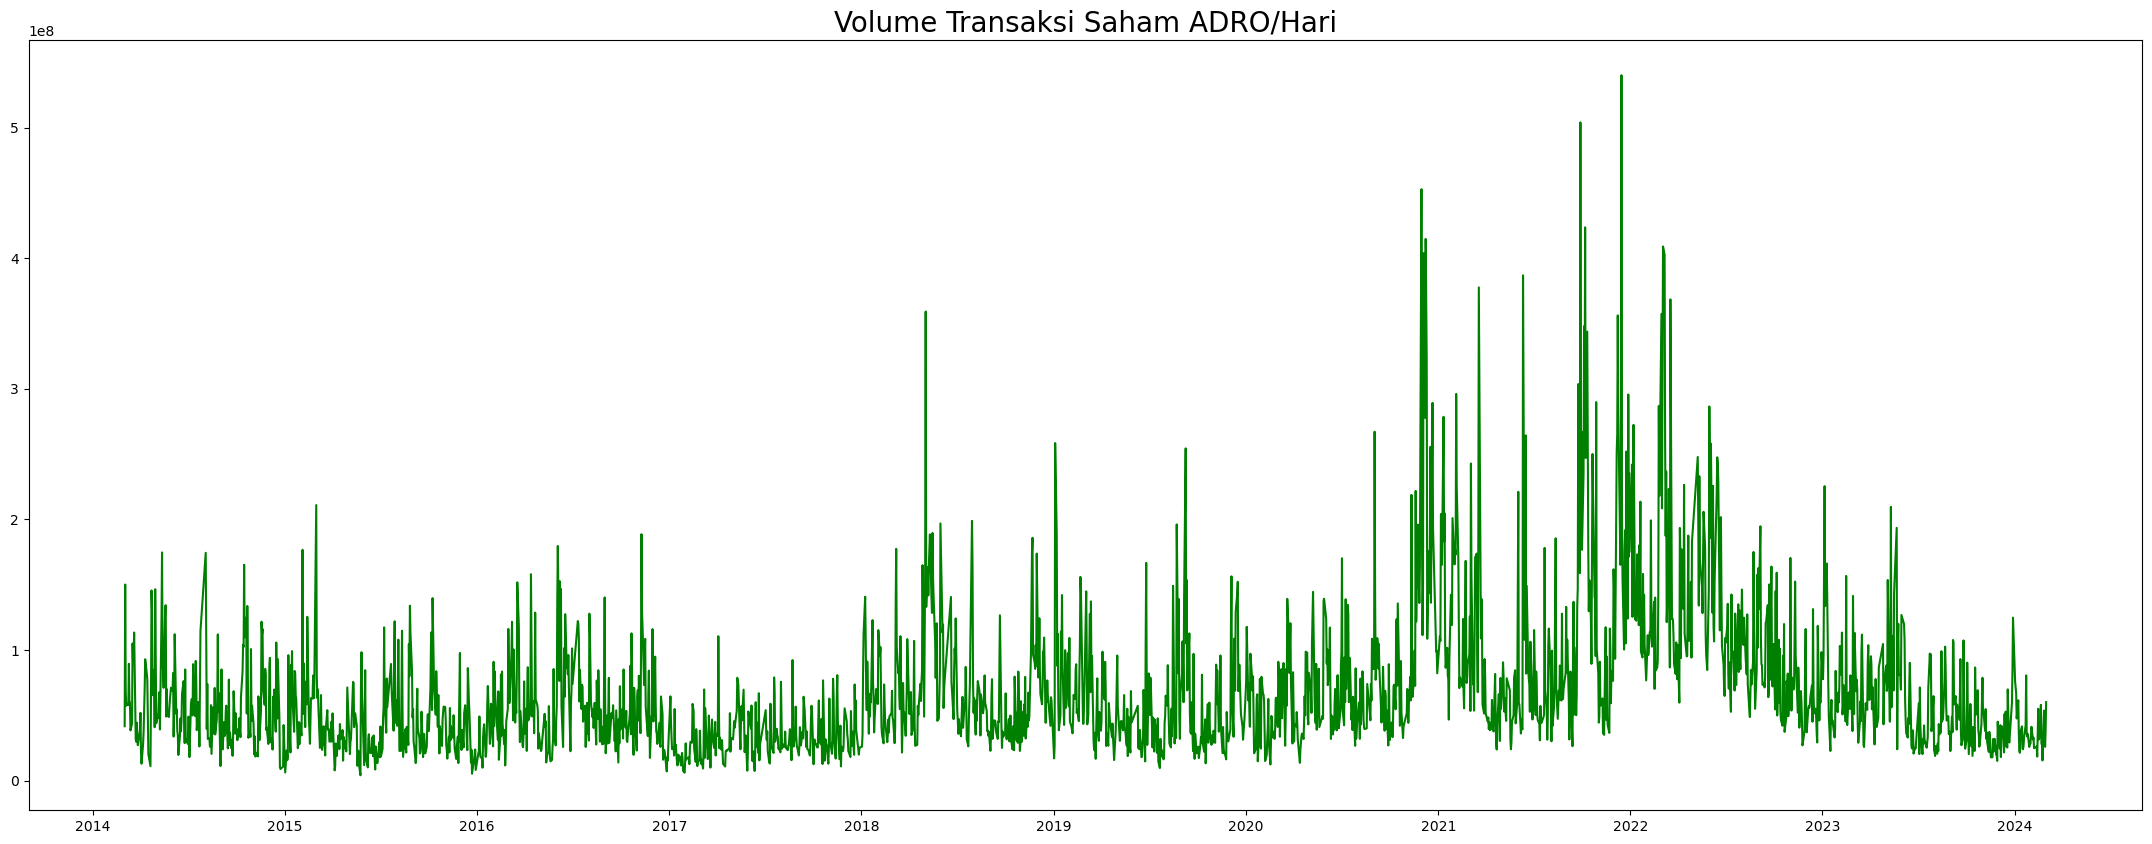

In [17]:
plt.figure(figsize=(60,10))

plt.subplot(1,2,1)
plt.plot(dataset['Tanggal'], dataset['Terakhir'])
plt.title('Harga Penutupan Saham ADRO/Hari', fontsize = 20)

plt.figure(figsize=(60,10))

plt.subplot(1,2,1)
plt.plot(dataset['Tanggal'], dataset['Vol'], 'g')
plt.title('Volume Transaksi Saham ADRO/Hari', fontsize = 20)

plt.show()

In [18]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu")
print(f"Using {device} device")

Using cuda device


In [19]:
data_use = np.column_stack((dataset['Terakhir'], dataset['Vol']))
tanggal_data = pd.DataFrame({'Tanggal' : dataset['Tanggal']})

print(data_use)
print(tanggal_data)

[[9.8000e+02 4.1650e+07]
 [1.0150e+03 1.5013e+08]
 [1.0200e+03 6.8200e+07]
 ...
 [2.4000e+03 2.5900e+07]
 [2.4200e+03 3.8750e+07]
 [2.4900e+03 6.0140e+07]]
        Tanggal
0    2014-03-03
1    2014-03-04
2    2014-03-05
3    2014-03-06
4    2014-03-07
...         ...
2426 2024-02-26
2427 2024-02-27
2428 2024-02-28
2429 2024-02-29
2430 2024-03-01

[2431 rows x 1 columns]


In [20]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_use)

In [21]:
x_train = []
y_train = []

seq_length = 10
for i in range (len(scaled_data) - seq_length):
    x_train.append(scaled_data[i:i + seq_length])
    y_train.append(scaled_data[i + seq_length, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train).reshape(-1, 1)

In [22]:
print(x_train)
print(y_train)

[[[0.14663786 0.07003434]
  [0.15608963 0.27246773]
  [0.15743989 0.11957901]
  ...
  [0.13718605 0.1060312 ]
  [0.14393732 0.1042211 ]
  [0.14393732 0.06410017]]

 [[0.15608963 0.27246773]
  [0.15743989 0.11957901]
  [0.15743989 0.09927596]
  ...
  [0.14393732 0.1042211 ]
  [0.14393732 0.06410017]
  [0.14663786 0.07380383]]

 [[0.15743989 0.11957901]
  [0.15743989 0.09927596]
  [0.15608963 0.10145929]
  ...
  [0.14393732 0.06410017]
  [0.14663786 0.07380383]
  [0.1452876  0.18836308]]

 ...

 [[0.5517148  0.0267224 ]
  [0.55981636 0.09507726]
  [0.56251687 0.05107487]
  ...
  [0.53551173 0.02118012]
  [0.52200913 0.09248339]
  [0.52470964 0.06057327]]

 [[0.55981636 0.09507726]
  [0.56251687 0.05107487]
  [0.53821224 0.05768083]
  ...
  [0.52200913 0.09248339]
  [0.52470964 0.06057327]
  [0.5301107  0.04064343]]

 [[0.56251687 0.05107487]
  [0.53821224 0.05768083]
  [0.53821224 0.1005449 ]
  ...
  [0.52470964 0.06057327]
  [0.5301107  0.04064343]
  [0.53551173 0.06462268]]]
[[0.146637

In [23]:
train_size = int(len(x_train) * 0.9)
x_train, x_test = x_train[:train_size], x_train[train_size:]
y_train, y_test = y_train[:train_size], y_train[train_size:]
tanggal_train, tanggal_test = tanggal_data[seq_length:train_size+seq_length],tanggal_data[train_size+seq_length:]

print(x_train.shape)
print(y_train.shape)
print(tanggal_train.shape)
print(y_test.shape)
print(tanggal_test.shape)

print(tanggal_test)

(2178, 10, 2)
(2178, 1)
(2178, 1)
(243, 1)
(243, 1)
        Tanggal
2188 2023-02-23
2189 2023-02-24
2190 2023-02-27
2191 2023-02-28
2192 2023-03-01
...         ...
2426 2024-02-26
2427 2024-02-27
2428 2024-02-28
2429 2024-02-29
2430 2024-03-01

[243 rows x 1 columns]


In [24]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [25]:
# Memastikan bentuk data benar
print(f"x_train_tensor shape: {x_train_tensor.shape}")  # (num_samples, seq_length, num_features)
print(f"y_train_tensor shape: {y_train_tensor.shape}")  # (num_samples, 1)
print(f"x_test_tensor shape: {x_test_tensor.shape}")    # (num_samples, seq_length, num_features)
print(f"y_test_tensor shape: {y_test_tensor.shape}")    # (num_samples, 1)

# Menampilkan contoh data dari x_train_tensor dan y_train_tensor
print("\nContoh data dari x_train_tensor:")
print(x_train_tensor[0])  # Menampilkan sampel pertama dari x_train_tensor

print("\nContoh data dari y_train_tensor:")
print(y_train_tensor[0])  # Menampilkan target pertama dari y_train_tensor

x_train_tensor shape: torch.Size([2178, 10, 2])
y_train_tensor shape: torch.Size([2178, 1])
x_test_tensor shape: torch.Size([243, 10, 2])
y_test_tensor shape: torch.Size([243, 1])

Contoh data dari x_train_tensor:
tensor([[0.1466, 0.0700],
        [0.1561, 0.2725],
        [0.1574, 0.1196],
        [0.1574, 0.0993],
        [0.1561, 0.1015],
        [0.1520, 0.1002],
        [0.1426, 0.1592],
        [0.1372, 0.1060],
        [0.1439, 0.1042],
        [0.1439, 0.0641]])

Contoh data dari y_train_tensor:
tensor([0.1466])


In [26]:
class StockPricePredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(StockPricePredictor, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.gru1 = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        self.gru2 = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        h0_lstm1 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0_lstm1 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm1(x, (h0_lstm1, c0_lstm1))
        
        h0_gru1 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru1(out, h0_gru1)
        
        h0_lstm2 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0_lstm2 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm2(out, (h0_lstm2, c0_lstm2))
        
        h0_gru2 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru2(out, h0_gru2)
        
        out = self.fc(out[:, -1, :])
        return out

In [27]:
# Membuat TensorDataset dan DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [28]:
print(f"x_train_tensor shape: {x_train_tensor.shape}")  # (num_samples, seq_length, num_features)
print(f"y_train_tensor shape: {y_train_tensor.shape}")  # (num_samples, 1)
print(f"x_test_tensor shape: {x_test_tensor.shape}")    # (num_samples, seq_length, num_features)
print(f"y_test_tensor shape: {y_test_tensor.shape}")    # (num_samples, 1)


x_train_tensor shape: torch.Size([2178, 10, 2])
y_train_tensor shape: torch.Size([2178, 1])
x_test_tensor shape: torch.Size([243, 10, 2])
y_test_tensor shape: torch.Size([243, 1])


In [29]:
input_size = x_train_tensor.shape[2]  # number of features, in this case 2
hidden_size = 64
num_layers = 1
num_epochs = 30
learning_rate = 0.001

# Initialize model, loss function, optimizer
model = StockPricePredictor(input_size, hidden_size, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    # Average training loss for this epoch
    train_losses.append(epoch_train_loss / len(train_loader))
    
    # Validation loss
    model.eval()
    epoch_val_loss = 0.0
    with torch.no_grad():
        for val_inputs, val_targets in test_loader:
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_targets)
            epoch_val_loss += val_loss.item()
    
    # Average validation loss for this epoch
    val_losses.append(epoch_val_loss / len(test_loader))
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}')


Epoch [1/30], Loss: 0.0012
Epoch [1/30], Training Loss: 0.0339, Validation Loss: 0.0019
Epoch [2/30], Loss: 0.0017
Epoch [2/30], Training Loss: 0.0012, Validation Loss: 0.0019
Epoch [3/30], Loss: 0.0010
Epoch [3/30], Training Loss: 0.0011, Validation Loss: 0.0013
Epoch [4/30], Loss: 0.0004
Epoch [4/30], Training Loss: 0.0010, Validation Loss: 0.0013
Epoch [5/30], Loss: 0.0002
Epoch [5/30], Training Loss: 0.0011, Validation Loss: 0.0012
Epoch [6/30], Loss: 0.0000
Epoch [6/30], Training Loss: 0.0009, Validation Loss: 0.0019
Epoch [7/30], Loss: 0.0001
Epoch [7/30], Training Loss: 0.0012, Validation Loss: 0.0012
Epoch [8/30], Loss: 0.0038
Epoch [8/30], Training Loss: 0.0009, Validation Loss: 0.0059
Epoch [9/30], Loss: 0.0018
Epoch [9/30], Training Loss: 0.0012, Validation Loss: 0.0013
Epoch [10/30], Loss: 0.0000
Epoch [10/30], Training Loss: 0.0007, Validation Loss: 0.0015
Epoch [11/30], Loss: 0.0031
Epoch [11/30], Training Loss: 0.0007, Validation Loss: 0.0035
Epoch [12/30], Loss: 0.0001


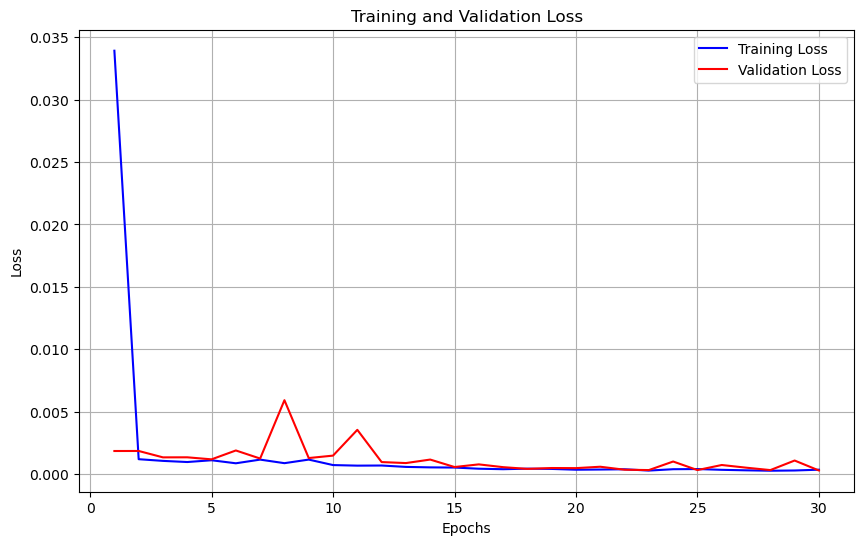

In [30]:
# Visualize the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Evaluation
model.eval()
with torch.no_grad():
    test_loss = 0
    predictions = []
    actuals = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
        predictions.extend(outputs.cpu().numpy())
        actuals.extend(targets.cpu().numpy())

test_loss /= len(test_loader)
print(f'Test Loss: {test_loss:.4f}')

Test Loss: 0.0003


In [32]:
# Convert predictions and actuals to numpy arrays
predictions = np.array(predictions)
actuals = np.array(actuals)

In [33]:
# Predictions
model.eval()
with torch.no_grad():
    predictions = []
    for inputs, _ in test_loader:
        outputs = model(inputs)
        predictions.extend(outputs.cpu().numpy())

predictions = np.array(predictions)
print(predictions[:10])  # Menampilkan 10 prediksi pertama

[[0.6547444 ]
 [0.6699835 ]
 [0.67208064]
 [0.6813084 ]
 [0.69887125]
 [0.69769156]
 [0.69424546]
 [0.7038665 ]
 [0.6801833 ]
 [0.66053367]]


In [34]:
# Membuat DataFrame untuk perbandingan hasil prediksi dan nilai aktual
comparison_df = pd.DataFrame({
    'Predicted': predictions.flatten(),
    'Actual': actuals.flatten()
})

# Menampilkan DataFrame
print(comparison_df)

     Predicted    Actual
0     0.654744  0.665136
1     0.669984  0.662436
2     0.672081  0.678639
3     0.681308  0.689441
4     0.698871  0.689441
..         ...       ...
238   0.541491  0.522009
239   0.532366  0.524710
240   0.528604  0.530111
241   0.532176  0.535512
242   0.539142  0.554415

[243 rows x 2 columns]


In [35]:
# Menghitung metrik
mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actuals, predictions)

# Menampilkan hasil
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4%}")

MSE: 0.0003
RMSE: 0.0174
MAPE: 2.2225%


In [36]:
# Membuat Data Frame
train_df = pd.DataFrame({
    'Tanggal': tanggal_train['Tanggal'],
    'Value': y_train.flatten(),
    'Type': 'Train'
})

test_df = pd.DataFrame({
    'Tanggal': tanggal_test['Tanggal'],
    'Value': y_test.flatten(),
    'Type': 'Test'
})

predicted_df = pd.DataFrame({
    'Tanggal': tanggal_test['Tanggal'],
    'Value': predictions.flatten(),
    'Type': 'Predicted'
})

In [37]:
compact_df = pd.concat([test_df, predicted_df])

In [38]:
# Menggabungkan DataFrame
combined_df = pd.concat([train_df, test_df, predicted_df])

# Menampilkan DataFrame
print(combined_df)

        Tanggal     Value       Type
10   2014-03-17  0.146638      Train
11   2014-03-18  0.145288      Train
12   2014-03-19  0.152039      Train
13   2014-03-20  0.141237      Train
14   2014-03-21  0.149338      Train
...         ...       ...        ...
2426 2024-02-26  0.541491  Predicted
2427 2024-02-27  0.532366  Predicted
2428 2024-02-28  0.528604  Predicted
2429 2024-02-29  0.532176  Predicted
2430 2024-03-01  0.539142  Predicted

[2664 rows x 3 columns]


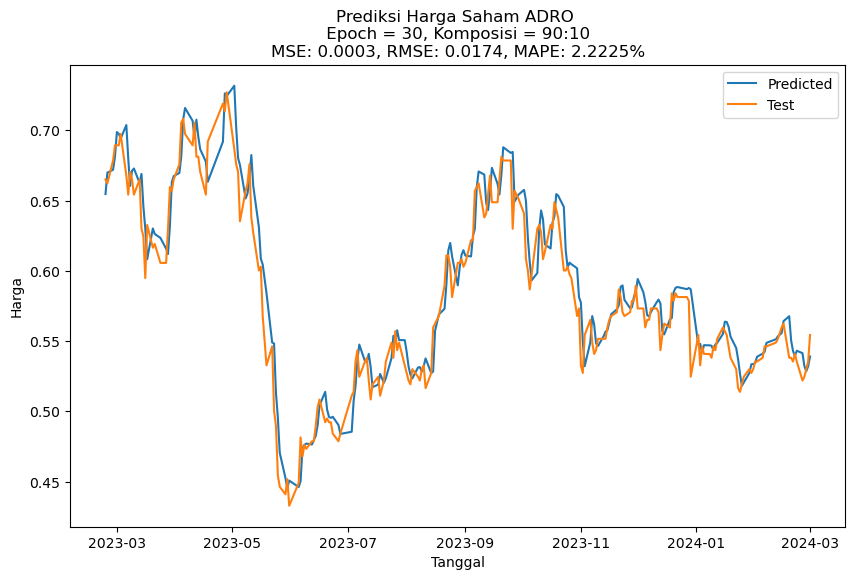

In [39]:
# Plotting hasil prediksi dan nilai aktual
plt.figure(figsize=(10, 6))
for label, df in compact_df.groupby('Type'):
    plt.plot(df['Tanggal'], df['Value'], label=label)
plt.title('Prediksi Harga Saham ADRO \n Epoch = 30, Komposisi = 90:10 \n' f"MSE: {mse:.4f}" ', ' f"RMSE: {rmse:.4f}" ', ' f"MAPE: {mape:.4%}")
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

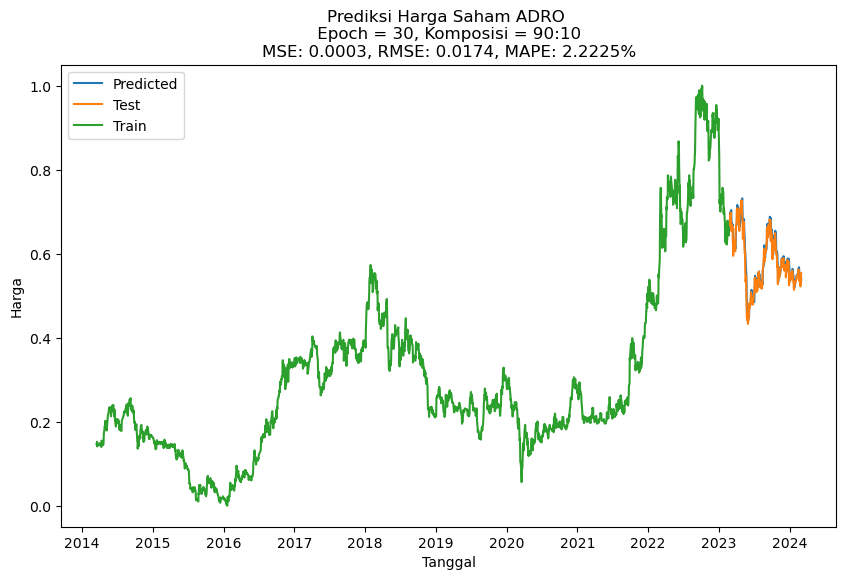

In [40]:
# Plotting hasil prediksi dan nilai aktual
plt.figure(figsize=(10, 6))
for label, df in combined_df.groupby('Type'):
    plt.plot(df['Tanggal'], df['Value'], label=label)
plt.title('Prediksi Harga Saham ADRO \n Epoch = 30, Komposisi = 90:10 \n' f"MSE: {mse:.4f}" ', ' f"RMSE: {rmse:.4f}" ', ' f"MAPE: {mape:.4%}")
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

# Prediksi 1 Bulan

In [41]:
#Import dataset

datapath_new = 'data/Data Historis ANTM 1 Bulan.csv'
dataset_new = pd.read_csv(datapath_new)
dataset_new

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,07/06/2024,2840,2850,2890,2820,"25,35M","-0,35%"
1,06/06/2024,2850,2880,2880,2820,"24,30M","-0,70%"
2,05/06/2024,2870,2900,2910,2840,"41,11M","-1,71%"
3,04/06/2024,2920,2900,2940,2850,"64,39M","-0,34%"
4,03/06/2024,2930,2800,2930,2800,"84,42M","5,78%"
5,31/05/2024,2770,2750,2810,2730,"95,44M","1,09%"
6,30/05/2024,2740,2680,2770,2680,"47,28M","2,24%"
7,29/05/2024,2680,2690,2710,2660,"23,08M","-0,37%"
8,28/05/2024,2690,2600,2710,2600,"85,17M","-6,27%"
9,27/05/2024,2870,2920,2940,2860,"70,61M","-1,71%"


In [42]:
dataset_new['Tanggal'] = pd.to_datetime(dataset_new['Tanggal'],
                                   format = '%d/%m/%Y')
dataset_new

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2024-06-07,2840,2850,2890,2820,"25,35M","-0,35%"
1,2024-06-06,2850,2880,2880,2820,"24,30M","-0,70%"
2,2024-06-05,2870,2900,2910,2840,"41,11M","-1,71%"
3,2024-06-04,2920,2900,2940,2850,"64,39M","-0,34%"
4,2024-06-03,2930,2800,2930,2800,"84,42M","5,78%"
5,2024-05-31,2770,2750,2810,2730,"95,44M","1,09%"
6,2024-05-30,2740,2680,2770,2680,"47,28M","2,24%"
7,2024-05-29,2680,2690,2710,2660,"23,08M","-0,37%"
8,2024-05-28,2690,2600,2710,2600,"85,17M","-6,27%"
9,2024-05-27,2870,2920,2940,2860,"70,61M","-1,71%"


In [43]:
dataset_new = dataset_new.sort_values(by='Tanggal',
                              ascending = True,
                              ignore_index = True)
dataset_new

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2024-04-16,2810,2740,2840,2730,"136,39M","4,07%"
1,2024-04-17,2750,2810,2830,2750,"40,04M","-2,14%"
2,2024-04-18,2730,2770,2770,2710,"34,87M","-0,73%"
3,2024-04-19,2760,2740,2790,2710,"48,53M","1,10%"
4,2024-04-22,2750,2770,2800,2750,"30,19M","-0,36%"
5,2024-04-23,2750,2750,2800,2740,"19,35M","0,00%"
6,2024-04-24,2680,2750,2770,2660,"39,04M","-2,55%"
7,2024-04-25,2620,2670,2690,2610,"32,56M","-2,24%"
8,2024-04-26,2600,2620,2670,2600,"28,06M","-0,76%"
9,2024-04-29,2670,2630,2680,2550,"27,69M","2,69%"


In [44]:
dataset_new = dataset_new.replace(to_replace = ',',
                          value = '.',
                          regex = True)
dataset_new

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2024-04-16,2810,2740,2840,2730,136.39M,4.07%
1,2024-04-17,2750,2810,2830,2750,40.04M,-2.14%
2,2024-04-18,2730,2770,2770,2710,34.87M,-0.73%
3,2024-04-19,2760,2740,2790,2710,48.53M,1.10%
4,2024-04-22,2750,2770,2800,2750,30.19M,-0.36%
5,2024-04-23,2750,2750,2800,2740,19.35M,0.00%
6,2024-04-24,2680,2750,2770,2660,39.04M,-2.55%
7,2024-04-25,2620,2670,2690,2610,32.56M,-2.24%
8,2024-04-26,2600,2620,2670,2600,28.06M,-0.76%
9,2024-04-29,2670,2630,2680,2550,27.69M,2.69%


In [45]:
def replace_value(value):
    if 'K' in value:
        return str(float(value.replace('K', '')) * 1000)
    elif 'M' in value:
        return str(float(value.replace('M', '')) * 1000000)
    elif 'B' in value:
        return str(float(value.replace('B', '')) * 1000000000)
    return value

dataset_new['Vol'] = dataset_new['Vol'].apply(replace_value)

dataset_new

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2024-04-16,2810,2740,2840,2730,136390000.0,4.07%
1,2024-04-17,2750,2810,2830,2750,40040000.0,-2.14%
2,2024-04-18,2730,2770,2770,2710,34870000.0,-0.73%
3,2024-04-19,2760,2740,2790,2710,48530000.0,1.10%
4,2024-04-22,2750,2770,2800,2750,30190000.0,-0.36%
5,2024-04-23,2750,2750,2800,2740,19350000.0,0.00%
6,2024-04-24,2680,2750,2770,2660,39040000.0,-2.55%
7,2024-04-25,2620,2670,2690,2610,32560000.000000004,-2.24%
8,2024-04-26,2600,2620,2670,2600,28060000.0,-0.76%
9,2024-04-29,2670,2630,2680,2550,27690000.0,2.69%


In [46]:
dataset_new = dataset_new.astype({'Terakhir': 'float32'})
dataset_new.dtypes

Tanggal       datetime64[ns]
Terakhir             float32
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                   object
Perubahan%            object
dtype: object

In [47]:
dataset_new = dataset_new.astype({'Vol': 'float32'})
dataset_new.dtypes

Tanggal       datetime64[ns]
Terakhir             float32
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                  float32
Perubahan%            object
dtype: object

In [48]:
data_use_new = np.column_stack((dataset_new['Terakhir'], dataset_new['Vol']))
tanggal_data_new = pd.DataFrame({'Tanggal' : dataset_new['Tanggal']})

print(data_use_new)
print(tanggal_data_new)

[[2.8100e+03 1.3639e+08]
 [2.7500e+03 4.0040e+07]
 [2.7300e+03 3.4870e+07]
 [2.7600e+03 4.8530e+07]
 [2.7500e+03 3.0190e+07]
 [2.7500e+03 1.9350e+07]
 [2.6800e+03 3.9040e+07]
 [2.6200e+03 3.2560e+07]
 [2.6000e+03 2.8060e+07]
 [2.6700e+03 2.7690e+07]
 [2.7100e+03 2.4500e+07]
 [2.7300e+03 4.9490e+07]
 [2.7300e+03 2.0540e+07]
 [2.8500e+03 5.6510e+07]
 [2.8100e+03 2.5680e+07]
 [2.8700e+03 4.3530e+07]
 [2.9500e+03 6.4340e+07]
 [2.8800e+03 2.6630e+07]
 [2.8300e+03 4.4480e+07]
 [2.8800e+03 3.3450e+07]
 [2.8800e+03 2.8090e+07]
 [2.9100e+03 2.7290e+07]
 [2.8800e+03 4.1190e+07]
 [2.9200e+03 3.1390e+07]
 [2.8700e+03 7.0610e+07]
 [2.6900e+03 8.5170e+07]
 [2.6800e+03 2.3080e+07]
 [2.7400e+03 4.7280e+07]
 [2.7700e+03 9.5440e+07]
 [2.9300e+03 8.4420e+07]
 [2.9200e+03 6.4390e+07]
 [2.8700e+03 4.1110e+07]
 [2.8500e+03 2.4300e+07]
 [2.8400e+03 2.5350e+07]]
      Tanggal
0  2024-04-16
1  2024-04-17
2  2024-04-18
3  2024-04-19
4  2024-04-22
5  2024-04-23
6  2024-04-24
7  2024-04-25
8  2024-04-26
9  2024-0

In [49]:
scaled_data_new = scaler.fit_transform(data_use_new)

In [50]:
harga_new = scaled_data_new[:, 0]
volume_new = scaled_data_new[:, 1]
print(harga_new)
print(volume_new)

[0.5999999  0.4285717  0.3714285  0.45714283 0.4285717  0.4285717
 0.22857141 0.05714321 0.         0.20000029 0.31428576 0.3714285
 0.3714285  0.7142854  0.5999999  0.7714286  1.0000005  0.7999997
 0.6571431  0.7999997  0.7999997  0.88571405 0.7999997  0.91428614
 0.7714286  0.25714302 0.22857141 0.4000001  0.48571444 0.94285727
 0.91428614 0.7714286  0.7142854  0.68571424]
[0.99999994 0.17677715 0.13260424 0.24931645 0.0926179  0.
 0.16823307 0.11286739 0.07441901 0.0712577  0.04400206 0.2575188
 0.01016746 0.3174983  0.05408408 0.20659602 0.38439846 0.06220096
 0.21471292 0.12047163 0.07467532 0.06784005 0.18660286 0.10287082
 0.43796992 0.56237185 0.03186944 0.23863634 0.6501196  0.55596375
 0.3848257  0.18591934 0.04229324 0.05126452]


In [51]:
seq_length = 10  # Panjang urutan yang digunakan untuk pelatihan
predict_length = 20 # Prediksi 1 minggu ke depan (5 hari perdagangan)

x_new = []

for i in range(len(scaled_data_new) - seq_length):
    x_new.append(scaled_data_new[i:i + seq_length])

x_new = np.array(x_new)

# Convert to PyTorch tensors
x_new_tensor = torch.tensor(x_new, dtype=torch.float32)

In [52]:
model.eval()
with torch.no_grad():
    predictions_new = model(x_new_tensor)

# Konversi prediksi dari tensor ke numpy array
predictions_new = predictions_new.numpy()

In [53]:
# Ambil hanya kolom harga dari prediksi (kolom pertama)
predicted_prices_new = scaler.inverse_transform(
    np.concatenate([predictions_new, np.zeros((predictions_new.shape[0], 1))], axis=1)
)[:, 0]

In [55]:
df_new = pd.DataFrame(dataset_new, columns=['Tanggal', 'Terakhir', 'Vol'])
df_new

,Tanggal,Terakhir,Vol
0,2024-04-16,2810.0,136390000.0
1,2024-04-17,2750.0,40040000.0
2,2024-04-18,2730.0,34870000.0
3,2024-04-19,2760.0,48530000.0
4,2024-04-22,2750.0,30190000.0
5,2024-04-23,2750.0,19350000.0
6,2024-04-24,2680.0,39040000.0
7,2024-04-25,2620.0,32560000.0
8,2024-04-26,2600.0,28060000.0
9,2024-04-29,2670.0,27690000.0


In [56]:
# Buat DataFrame untuk prediksi dimulai dari tanggal 10
# Ambil tanggal terakhir dari data asli
last_date = pd.to_datetime(df_new['Tanggal'].iloc[-1])

# Tentukan tanggal mulai prediksi
start_date = last_date + pd.Timedelta(days=3)  # Dari tanggal 7 ke tanggal 10

# Buat range tanggal untuk prediksi
pred_dates = pd.date_range(start=start_date, periods=predict_length)

In [57]:
# Buat DataFrame untuk prediksi
pred_df = pd.DataFrame({'Tanggal': pred_dates, 'Harga_Terprediksi': predicted_prices_new[-predict_length:]})

# Gabungkan dengan DataFrame asli
result_df_new = pd.concat([df_new, pred_df[['Tanggal', 'Harga_Terprediksi']]], axis=0)

In [58]:
# Gabungkan dengan DataFrame asli
result_df_new = pd.concat([df_new, pred_df[['Tanggal', 'Harga_Terprediksi']]], axis=0)

print(result_df_new)

      Tanggal  Terakhir          Vol  Harga_Terprediksi
0  2024-04-16    2810.0  136390000.0                NaN
1  2024-04-17    2750.0   40040000.0                NaN
2  2024-04-18    2730.0   34870000.0                NaN
3  2024-04-19    2760.0   48530000.0                NaN
4  2024-04-22    2750.0   30190000.0                NaN
5  2024-04-23    2750.0   19350000.0                NaN
6  2024-04-24    2680.0   39040000.0                NaN
7  2024-04-25    2620.0   32560000.0                NaN
8  2024-04-26    2600.0   28060000.0                NaN
9  2024-04-29    2670.0   27690000.0                NaN
10 2024-04-30    2710.0   24500000.0                NaN
11 2024-05-02    2730.0   49490000.0                NaN
12 2024-05-03    2730.0   20540000.0                NaN
13 2024-05-06    2850.0   56510000.0                NaN
14 2024-05-07    2810.0   25680000.0                NaN
15 2024-05-08    2870.0   43530000.0                NaN
16 2024-05-13    2950.0   64340000.0            

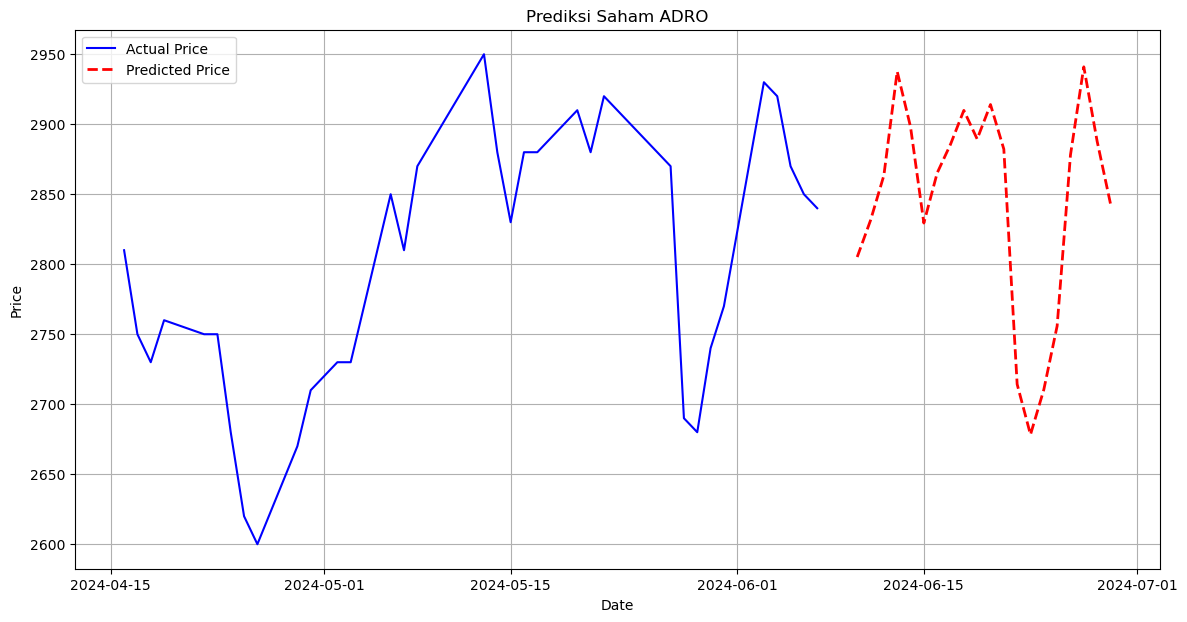

In [59]:
# Plotting
plt.figure(figsize=(14, 7))

# Plot data asli
plt.plot(result_df_new['Tanggal'][:len(df_new)], df_new['Terakhir'], label='Actual Price', color='blue')

# Plot data prediksi
plt.plot(pred_df['Tanggal'], pred_df['Harga_Terprediksi'], label='Predicted Price', color='red', linestyle='--', linewidth=2)

# Konfigurasi grafik
plt.title('Prediksi Saham ADRO')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Menampilkan grafik
plt.show()